In [1]:
from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric


In [3]:
from enum import Enum
UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')
uncertaintyMethod = "evidential"


In [4]:

config = {
	"training": True,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 1,
	"Uncertainty": {
		"annealing_step": 10*375/2 # 1875
	},
	"uncertainty_method": uncertaintyMethod
}

'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
ic(dates)
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = addPastDeforestationInput,
# 	borderBuffer = 2)	
# dataset = MTDeforestationTime()	
# [2016, 2017, 2018]


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()

exp = 170

# if config["training"] == True:
trainer = TrainerEvidential(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


ic| dates: [2018, 2019]
ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
exp

142

In [6]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [7]:
# ic(type(dataset), exp, dataset.dates)


In [8]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [9]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [10]:

trainer.label_mask.dtype

dtype('uint8')

In [11]:

trainer.getLabelCurrentDeforestation()

In [12]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [13]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

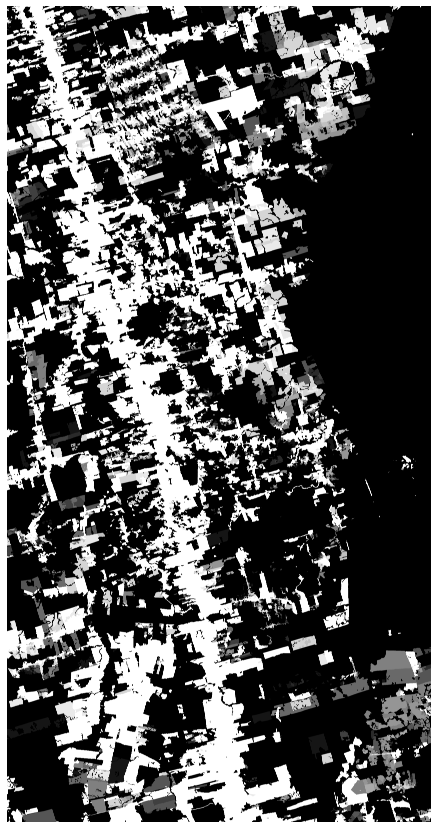

In [14]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [15]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [16]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [17]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


ic| im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| im_idx.shape: (17730, 9200, 2), im_idx.dtype: dtype('uint16')


In [18]:
if config["training"] == True:
    trainer.extractCoords()

ic| coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| coords.shape: (110896, 2), coords.dtype: dtype('uint16')


In [19]:
if config["training"] == True:
    trainer.trainTestSplit()

ic| self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [20]:
if config["training"] == True:
    trainer.label_mask.shape

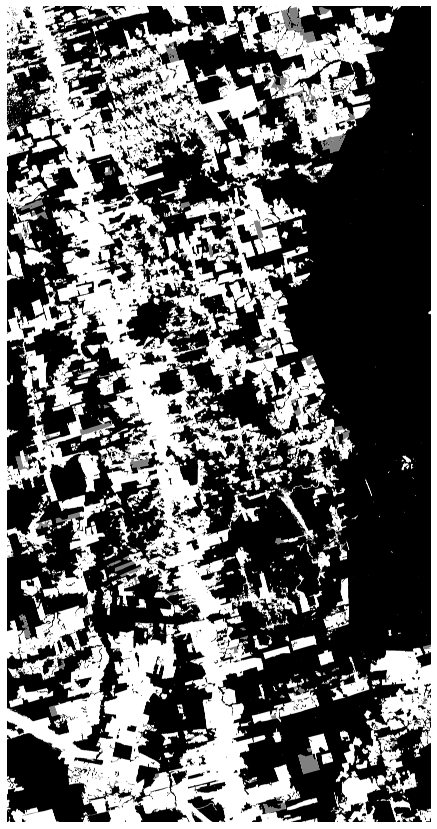

In [21]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [22]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [23]:
if config["training"] == True:
    print(trainer.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [24]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

training samples:  (3753, 3) validation samples:  (1032, 3)


In [25]:
if config["training"] == True:
    inputSnipShow = True

ic| np.mean(image_patch[...,[1,2,3]]): 0.107682176
    np.mean(image_patch[...,[11,12,13]]): 0.22637562


[12084  2508     0]


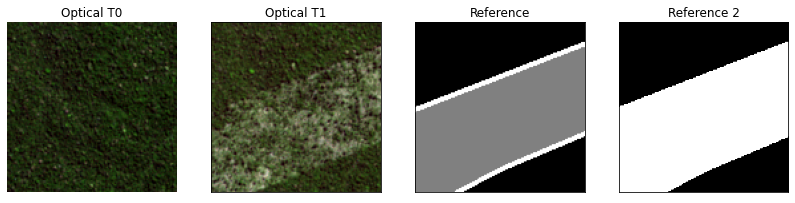

In [26]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


ic| np.mean(image_patch[...,[1,2,3]]): 0.2714837
    np.mean(image_patch[...,[11,12,13]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]


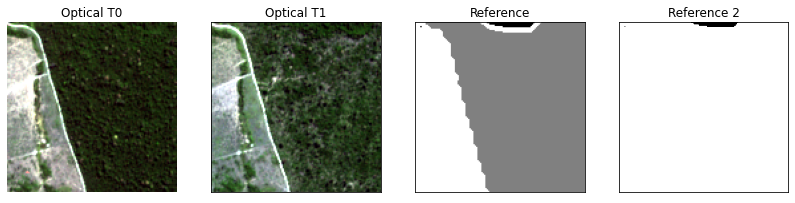

In [27]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


ic| np.mean(image_patch[...,[1,2,3]]): 0.15096879
    np.mean(image_patch[.

[3382 2128    0]


..,[11,12,13]]): 0.103304155


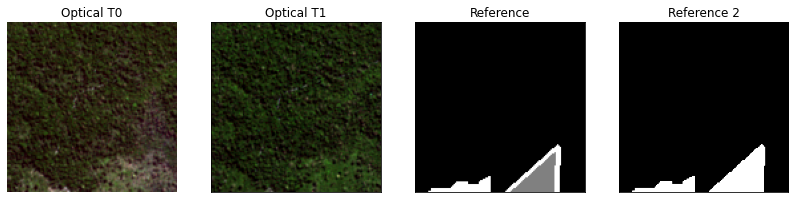

In [28]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

[ 608 6574    0]


ic| np.mean(image_patch[...,[1,2,3]]): 0.09604081
    np.mean(image_patch[...,[11,12,13]]): 0.23388559


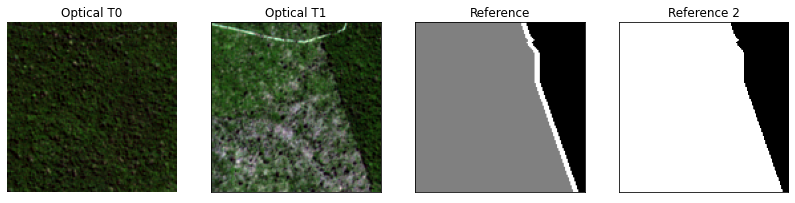

In [29]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [30]:
if config["training"] == True:
    trainer.getGenerators()


In [31]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [32]:
if config["training"] == True:
    print(trainer.path_exp)

D:/Jorge/datasets/deforestation/experiments/exp142


In [33]:
if config["training"] == True:
    print(trainer.channels)

21


In [34]:
if config["training"] == True:
    print(trainer.image_stack.shape)

(17730, 9200, 21)


### Evidential metrics

In [35]:
if config["training"] == True:
    trainer.train()

time:  0
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (Dropout)             (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
_____________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
self.global_step 0.0
alpha Tensor("loss/add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("loss/truediv:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(KL_reg) Tensor("mul_6:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add_7:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv_5:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(KL_reg) Tensor("mul_12:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("loss/add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("loss/truediv:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(KL_reg) Tensor("mul_6:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add_7:0", shape=(None, 128, 128, 3), dtype=float

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
self.global_step 350.0
351/351 [==============================] - 32s 91ms/step - loss: 0.2172 - accuracy: 0.8200 - KL_term: 0.0115 - loglikelihood_term: 0.2056 - evidential_success: 79.2889 - evidential_fail: 2.3576 - acc: 0.8201 - annealing_coef: 0.1867 - global_step_get: 350.0000 - annealing_step_get: 1875.0000 - val_loss: 0.2431 - val_accuracy: 0.7908 - val_KL_term: 0.0148 - val_loglikelihood_term: 0.2251 - val_evidential_success: 90.7352 - val_evidential_fail: 1.9463 - val_acc: 0.7946 - val_annealing_coef: 0.3733 - val_global_step_get: 700.0000 - val_annealing_step_get: 1875.0000

Epoch 00002: val_loss improved from 0.25469 to 0.24306, saving model to D:/Jorge/datasets/deforestation/experiments/exp142/models\resunet_0.h5
Epoch 3/100
self.global_step 700.0
351/351 [==============================] - 32s 91ms/step - loss: 0.2132 - accuracy: 0.8216 - KL_term: 0.0127 - loglikelihood_term: 0.2007 - evidential_success: 97.8555 - evidential_fail: 1.7670 - acc: 0.8214 - anneali

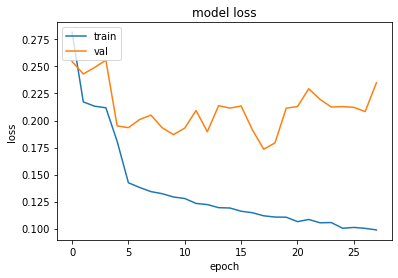

In [36]:
if config["training"] == True:
    trainer.plotHistory()


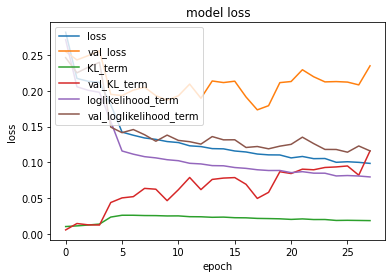

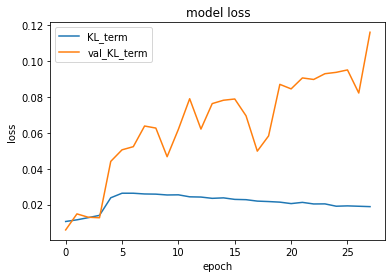

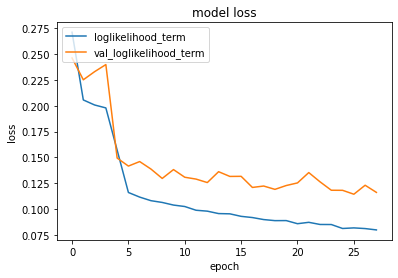

In [37]:
if config["training"] == True:
    trainer.plotLossTerms()

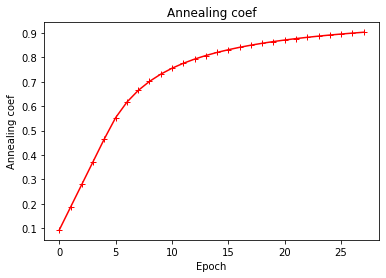

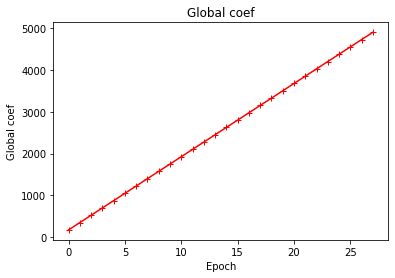

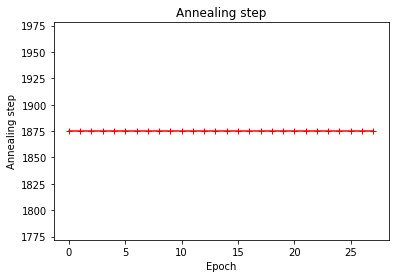

In [38]:
if config["training"] == True:
    trainer.plotAnnealingCoef()

In [39]:
def draw_EDL_results(K, history):
    # train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    '''
    K: known classes
    '''
    train_u_succ = K / (K+np.array(history['evidential_success']))
    train_u_fail = K / (K+np.array(history['evidential_fail']))
    test_u_succ  = K / (K+np.array(history['val_evidential_success']))
    test_u_fail  = K / (K+np.array(history['val_evidential_fail']))
    
    f, axs = plt.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(history['evidential_success'],c='r',marker='+')
    axs[0,0].plot(history['evidential_fail'],c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(history['acc'],c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(history['val_evidential_success'],c='r',marker='+')
    axs[1,0].plot(history['val_evidential_fail'],c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(history['val_acc'],c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    

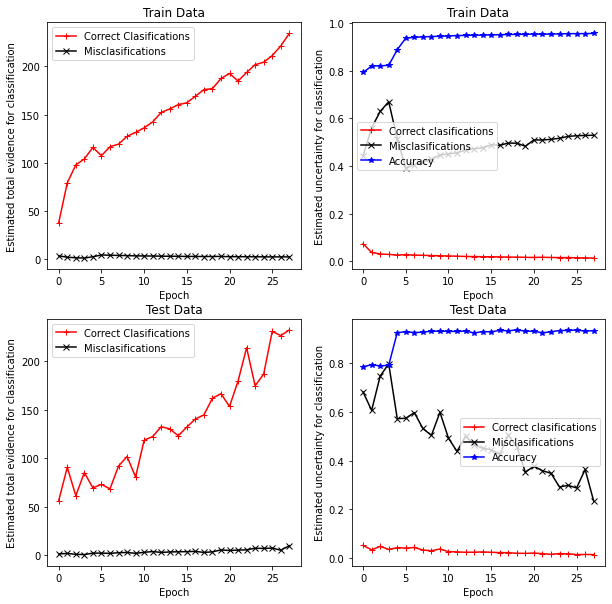

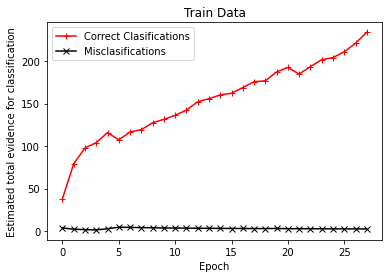

In [40]:
if config["training"] == True:
    draw_EDL_results(trainer.class_n, trainer.history.history)

    plt.figure(5)
    plt.plot(trainer.history.history['evidential_success'],c='r',marker='+')
    plt.plot(trainer.history.history['evidential_fail'],c='k',marker='x')
    plt.title('Train Data')
    plt.xlabel('Epoch')
    plt.ylabel('Estimated total evidence for classification') 
    plt.legend(['Correct Clasifications','Misclasifications'])


In [41]:
trainer.image_stack.shape

(17730, 9200, 21)

In [42]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [43]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]

In [44]:
trainer.image_stack.shape

(17730, 9200, 21)

In [45]:
trainer.setPadding()

-30.0 -16.0


In [46]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp142/models/resunet_0.h5'


time:  0


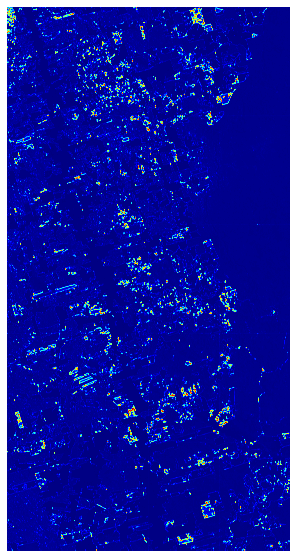

In [47]:
trainer.logger.plotFigure(trainer.u_reconstructed, 
            name='Uncertainty', cmap='jet', savefig=False, figsize=(10,10))

In [48]:
trainer.loadPredictedProbabilities()


In [49]:
trainer.prob_rec.shape

(17760, 9216)

In [50]:
trainer.getMeanProb()

In [51]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0007836027
    np.mean(value): 0.023719154
    np.max(value): 0.9728311


In [52]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

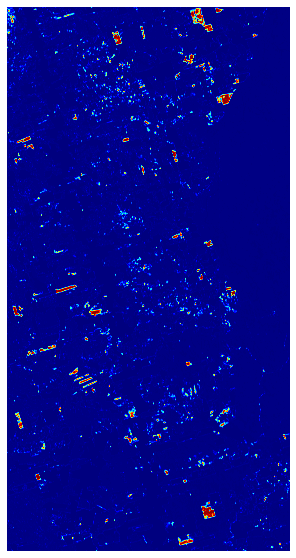

In [53]:
trainer.unpadMeanProb()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

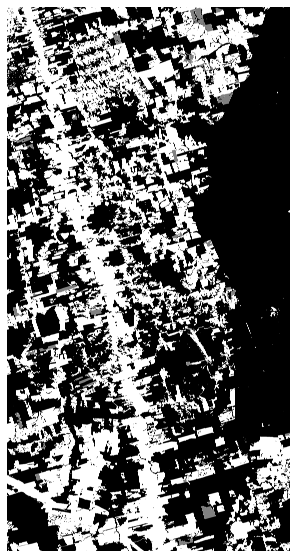

In [54]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [55]:
trainer.squeezeLabel()

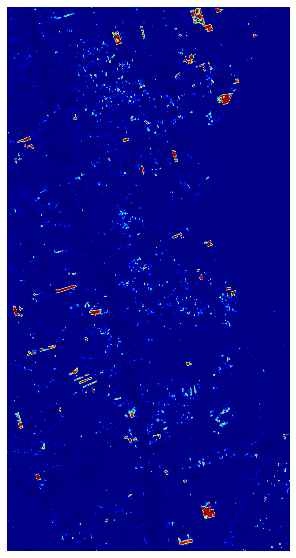

In [56]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [57]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0
    np.mean(value): 0.020862134
    np.max(value): 0.9728311


In [58]:
print(trainer.label_mask.shape)

(17730, 9200)


In [59]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [60]:
trainer.getMAP()

83.69


In [61]:
trainer.prob_rec.shape

(17760, 9216)

In [62]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(17760, 9216, 1)


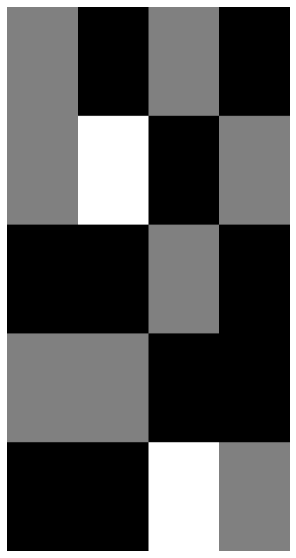

In [63]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [64]:
trainer.getLabelCurrentDeforestation()

In [65]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161212739,   1903261], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [66]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [67]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161212739,   1903261], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161399079,   1716921], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162929660,    186340], dtype=int64))


In [68]:
trainer.calculateMetrics()

ic| self.f1: 78.3, self.precision: 80.37, self.recall: 76.32


In [69]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9429404,)
ic| f1_val: 81.61
    precision_val: 83.01
    recall_val: 80.26
    mAP_val: 86.94


In [70]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [71]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162395731,    720269], dtype=int64))


In [72]:
'''

import types

trainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)
'''


'\n\nimport types\n\ntrainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)\n'

In [73]:
trainer.getErrorMaskToShowRGB()

In [74]:

'''
trainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)
'''

'\ntrainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)\n'

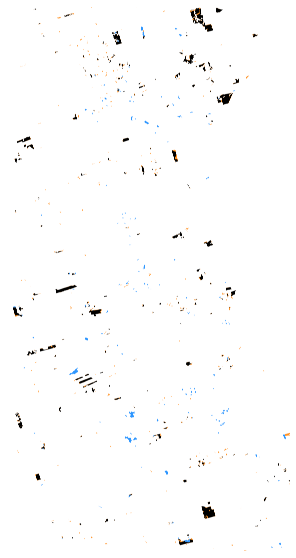

In [75]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [76]:
trainer.setUncertainty()

In [77]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54142379,)


In [78]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0, np.mean(value): 0.03503067, np.max(value): 1.0


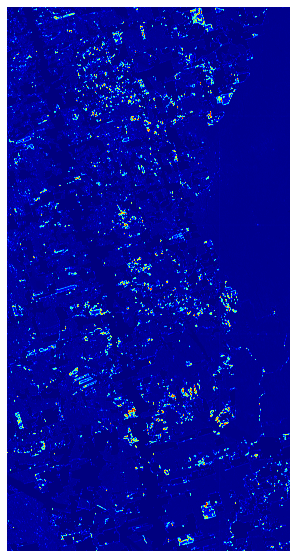

In [79]:
trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty evidential learning.png', figsize=(10,10), cmap='jet', savefig=True)

ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


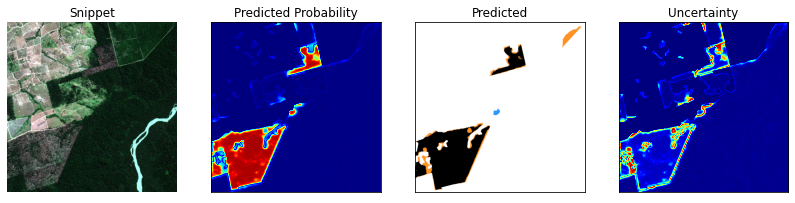

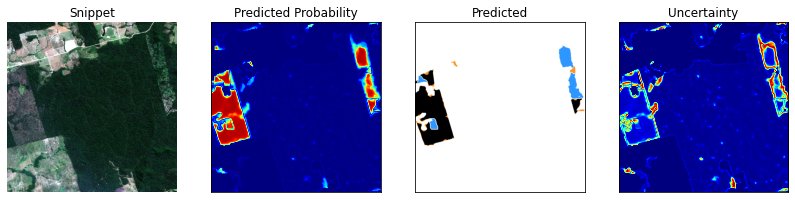

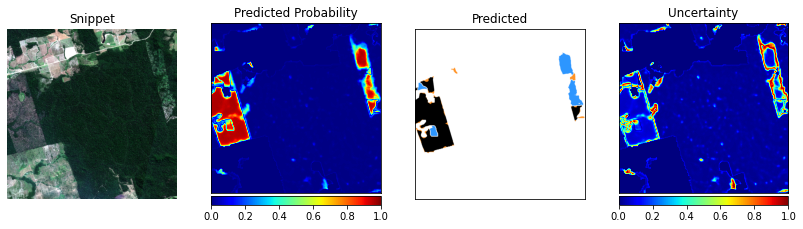

In [80]:
trainer.logger.plotCropSample(trainer)

In [81]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 0.007765797
    np.mean(value): 0.051146112
    np.max(value): 1.0


In [82]:
trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54142379,)
    self.label_mask_current_deforestation_test.shape: (54142379,)


[0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
threshold 0.15
(50776593,) (50776593,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3365786,)
    predicted_test_classified_incorrect.shape: (3365786,)


cm_correct [[50409346    19235]
 [   17411   330601]]


ic| TP_H + FN_H + FP_H + TN_H: 3365786
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 3365786
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[2859867  117938]
 [ 156858  231123]]
[0.94501709 0.94997012 0.44919041 0.06216546 0.66212782 0.59570701]
threshold 0.2
(51392128,) (51392128,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2750251,)
    predicted_test_classified_incorrect.shape: (2750251,)


cm_correct [[50959869    35939]
 [   20408   375912]]


ic| TP_H + FN_H + FP_H + TN_H: 2750251
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 2750251
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[2309344  101234]
 [ 153861  185812]]
[0.91273786 0.94850626 0.51075486 0.05079664 0.64732482 0.547032  ]
threshold 0.225
(51611419,) (51611419,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2530960,)
    predicted_test_classified_incorrect.shape: (2530960,)


cm_correct [[51154524    42828]
 [   21691   392376]]


ic| TP_H + FN_H + FP_H + TN_H: 2530960
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 2530960
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[2114689   94345]
 [ 152578  169348]]
[0.90159098 0.94761476 0.53312464 0.04674638 0.64221652 0.52604636]
threshold 0.25
(51796218,) (51796218,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2346161,)
    predicted_test_classified_incorrect.shape: (2346161,)


cm_correct [[51317746    48778]
 [   22926   406768]]


ic| TP_H + FN_H + FP_H + TN_H: 2346161
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 2346161
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[1951467   88395]
 [ 151343  154956]]
[0.8929241  0.94664575 0.55267917 0.04333317 0.63675925 0.50589783]
threshold 0.27
(51927062,) (51927062,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2215317,)
    predicted_test_classified_incorrect.shape: (2215317,)


cm_correct [[51432463    53487]
 [   23859   417253]]


ic| TP_H + FN_H + FP_H + TN_H: 2215317
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 2215317
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[1836750   83686]
 [ 150410  144471]]
[0.88637677 0.9459117  0.56692523 0.04091651 0.63320871 0.48992984]
threshold 0.3
(52097465,) (52097465,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2044914,)
    predicted_test_classified_incorrect.shape: (2044914,)


cm_correct [[51581337    59822]
 [   25172   431134]]


ic| TP_H + FN_H + FP_H + TN_H: 2044914
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 2044914
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[1687876   77351]
 [ 149097  130590]]
[0.87815201 0.94483526 0.58578546 0.03776919 0.62801468 0.4669148 ]
threshold 0.34
(52291199,) (52291199,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1851180,)
    predicted_test_classified_incorrect.shape: (1851180,)


cm_correct [[51749135    67819]
 [   26817   447428]]


ic| TP_H + FN_H + FP_H + TN_H: 1851180
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1851180
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[1520078   69354]
 [ 147452  114296]]
[0.86837575 0.94345328 0.60792426 0.03419096 0.62235775 0.43666427]
threshold 0.36
(52376123,) (52376123,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1766256,)
    predicted_test_classified_incorrect.shape: (1766256,)


cm_correct [[51821542    71776]
 [   27672   455133]]


ic| TP_H + FN_H + FP_H + TN_H: 1766256
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1766256
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[1447671   65397]
 [ 146597  106591]]
[0.86377913 0.94268493 0.61839311 0.03262243 0.61975836 0.42099547]
threshold 0.45
(52682046,) (52682046,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1460333,)
    predicted_test_classified_incorrect.shape: (1460333,)
ic| TP_H + FN_H + FP_H +

cm_correct [[52077142    87892]
 [   31094   485918]]
cm_incorrect [[1192071   49281]
 [ 143175   75806]]


 TN_H: 1460333
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1460333
    len(label_mask_current_deforestation_test): 54142379


[0.84682735 0.93985826 0.66022095 0.02697209 0.60602621 0.34617615]
threshold 0.55
(52927259,) (52927259,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1215120,)
    predicted_test_classified_incorrect.shape: (1215120,)
ic| TP_H + FN_H + FP_H + TN_H: 1215120
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1215120
    len(label_mask_current_deforestation_test): 54142379


cm_correct [[52275527   104215]
 [   34880   512637]]
cm_incorrect [[993686  32958]
 [139389  49087]]
[0.83105348 0.93629422 0.69652429 0.02244305 0.59829362 0.26044165]
threshold 0.65
(53145999,) (53145999,)


ic| label_current_deforestation_test_classified_incorrect.shape: (996380,)
    predicted_test_classified_incorrect.shape: (996380,)
ic| TP_H + FN_H + FP_H + TN_H: 996380
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 996380
    len(label_mask_current_deforestation_test): 54142379


cm_correct [[52449058   120060]
 [   40014   536867]]
cm_incorrect [[820155  17113]
 [134255  24857]]
[0.81723997 0.93063734 0.7294458  0.01840296 0.59225637 0.15622329]
threshold 0.8
(53523281,) (53523281,)


ic| label_current_deforestation_test_classified_incorrect.shape: (619098,)
    predicted_test_classified_incorrect.shape: (619098,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 619098
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 619098
    len(label_mask_current_deforestation_test): 54142379


cm_correct [[52753829   137173]
 [   70555   561724]]
cm_incorrect [[515384      0]
 [103714      0]]
[0.8037293  0.8884116  0.76321922 0.01143463        nan 0.        ]


In [83]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54142379,)
    self.label_mask_current_deforestation_test.shape: (54142379,)


threshold 0.15
(54142379,) (54142379,)
cm_audited [[53387151    19235]
 [   17411   718582]]
[0.97392985 0.97634353]
threshold 0.2
(54142379,) (54142379,)
cm_audited [[53370447    35939]
 [   20408   715585]]
[0.95217851 0.97227148]
threshold 0.225
(54142379,) (54142379,)
cm_audited [[53363558    42828]
 [   21691   714302]]
[0.94343376 0.97052825]
threshold 0.25
(54142379,) (54142379,)
cm_audited [[53357608    48778]
 [   22926   713067]]
[0.93597385 0.96885025]
threshold 0.27
(54142379,) (54142379,)
cm_audited [[53352899    53487]
 [   23859   712134]]
[0.93013906 0.96758257]
threshold 0.3
(54142379,) (54142379,)
cm_audited [[53346564    59822]
 [   25172   710821]]
[0.92237391 0.96579859]
threshold 0.34
(54142379,) (54142379,)
cm_audited [[53338567    67819]
 [   26817   709176]]
[0.9127163  0.96356351]
threshold 0.36
(54142379,) (54142379,)
cm_audited [[53334610    71776]
 [   27672   708321]]
[0.90799093 0.96240182]
threshold 0.45
(54142379,) (54142379,)
cm_audited [[53318494    8

ic| metric_values_audited: array([[0.97392985, 0.97634353],
                                  [0.95217851, 0.97227148],
                                  [0.94343376, 0.97052825],
                                  [0.93597385, 0.96885025],
                                  [0.93013906, 0.96758257],
                                  [0.92237391, 0.96579859],
                                  [0.9127163 , 0.96356351],
                                  [0.90799093, 0.96240182],
                                  [0.88913598, 0.95775232],
                                  [0.8705931 , 0.95260824],
                                  [0.85287468, 0.94563264],
                                  [0.82909155, 0.90413632]])


cm_audited [[53269213   137173]
 [   70555   665438]]
[0.82909155 0.90413632]


In [84]:
trainer.setPlotLimsForUncertaintyAA()

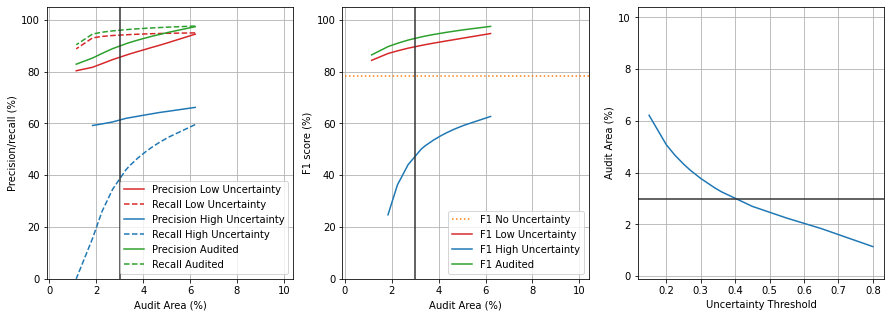

In [85]:
trainer.plotUncertaintyAA()

In [86]:
trainer.getOptimalUncertaintyThreshold()

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484
(52463099,) (52463099,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1679280,)
    predicted_test_classified_incorrect.shape: (1679280,)
ic

cm_correct [[51895133    76010]
 [   28587   463369]]
cm_incorrect [[1374080   61163]
 [ 145682   98355]]


| TP_H + FN_H + FP_H + TN_H: 1679280
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1679280
    len(label_mask_current_deforestation_test): 54142379


[0.85907868 0.94189114 0.62958343 0.031016   0.61657619 0.40303315]
0.6176798867836452
threshold 0.6176798867836452
(53073435,) (53073435,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1068944,)
    predicted_test_classified_incorrect.shape: (1068944,)
ic| TP_H + FN_H + FP_H + TN_H: 1068944
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1068944
    len(label_mask_current_deforestation_test): 54142379


cm_correct [[52391502   114987]
 [   38046   528900]]
cm_incorrect [[877711  22186]
 [136223  32824]]
[0.82141742 0.93289308 0.71862097 0.0197432  0.59669151 0.19417085]
0.23685977356729035
threshold 0.23685977356729035
(51702347,) (51702347,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2440032,)
    predicted_test_classified_incorrect.shape: (2440032,)


cm_correct [[51235005    45635]
 [   22292   399415]]


ic| TP_H + FN_H + FP_H + TN_H: 2440032
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 2440032
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[2034208   91538]
 [ 151977  162309]]
[0.89746096 0.94713865 0.54268859 0.04506695 0.63939696 0.51643726]
0.4449725940635156
threshold 0.4449725940635156
(52667875,) (52667875,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1474504,)
    predicted_test_classified_incorrect.shape: (1474504,)
ic| TP_H + FN_H + FP_H + TN_H: 1474504
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1474504
    len(label_mask_current_deforestation_test): 

cm_correct [[52065457    87065]
 [   30917   484436]]
cm_incorrect [[1203756   50108]
 [ 143352   77288]]


54142379


[0.84765556 0.94000811 0.65820735 0.02723382 0.60667525 0.35029007]
0.3267592074855162
threshold 0.3267592074855162
(52231118,) (52231118,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1911261,)
    predicted_test_classified_incorrect.shape: (1911261,)


cm_correct [[51697344    65164]
 [   26260   442350]]


ic| TP_H + FN_H + FP_H + TN_H: 1911261
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1911261
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[1571869   72009]
 [ 148009  119374]]
[0.87160157 0.94396193 0.60102474 0.03530065 0.62374401 0.44645322]
0.3979289595870169
threshold 0.3979289595870169
(52519085,) (52519085,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623294,)
    predicted_test_classified_incorrect.shape: (1623294,)


cm_correct [[51942146    78976]
 [   29148   468815]]


ic| TP_H + FN_H + FP_H + TN_H: 1623294
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1623294
    len(label_mask_current_deforestation_test): 54142379


cm_incorrect [[1327067   58197]
 [ 145121   92909]]
[0.85582823 0.94146553 0.63698296 0.02998195 0.61485977 0.39032475]
0.40649408957243227
threshold 0.40649408957243227
(52548177,) (52548177,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1594202,)
    predicted_test_classified_incorrect.shape: (1594202,)
ic

cm_correct [[51966446    80473]
 [   29465   471793]]
cm_incorrect [[1302767   56700]
 [ 144804   89931]]


| TP_H + FN_H + FP_H + TN_H: 1594202
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1594202
    len(label_mask_current_deforestation_test): 54142379


[0.8542858  0.9412179  0.64102919 0.02944462 0.61331506 0.38311713]
0.3962253241957688
threshold 0.3962253241957688
(52513122,) (52513122,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1629257,)
    predicted_test_classified_incorrect.shape: (1629257,)
ic

cm_correct [[51937171    78662]
 [   29084   468205]]
cm_incorrect [[1332042   58511]
 [ 145185   93519]]


| TP_H + FN_H + FP_H + TN_H: 1629257
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1629257
    len(label_mask_current_deforestation_test): 54142379


[0.85615881 0.94151489 0.63615415 0.03009208 0.61513517 0.3917781 ]
0.39917825839536253
threshold 0.39917825839536253
(52523406,) (52523406,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1618973,)
    predicted_test_classified_incorrect.shape: (1618973,)
ic

cm_correct [[51945805    79184]
 [   29194   469223]]
cm_incorrect [[1323408   57989]
 [ 145075   92501]]


| TP_H + FN_H + FP_H + TN_H: 1618973
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1618973
    len(label_mask_current_deforestation_test): 54142379


[0.85561089 0.94142656 0.63753731 0.02990214 0.61466543 0.3893533 ]
0.3976748843419153
threshold 0.3976748843419153
(52518185,) (52518185,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624194,)
    predicted_test_classified_incorrect.shape: (1624194,)
ic

cm_correct [[51941404    78931]
 [   29138   468712]]
cm_incorrect [[1327809   58242]
 [ 145131   93012]]


| TP_H + FN_H + FP_H + TN_H: 1624194
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1624194
    len(label_mask_current_deforestation_test): 54142379


[0.85587143 0.94147233 0.63684301 0.02999857 0.61493911 0.39057205]
0.3973664094435117
threshold 0.3973664094435117
(52517108,) (52517108,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625271,)
    predicted_test_classified_incorrect.shape: (1625271,)
ic

cm_correct [[51940501    78884]
 [   29123   468600]]
cm_incorrect [[1328712   58289]
 [ 145146   93124]]


| TP_H + FN_H + FP_H + TN_H: 1625271
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1625271
    len(label_mask_current_deforestation_test): 54142379


[0.85591542 0.94148753 0.63669084 0.03001846 0.61503306 0.39083393]
0.3976415451101102
threshold 0.3976415451101102
(52518056,) (52518056,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624323,)
    predicted_test_classified_incorrect.shape: (1624323,)
ic

cm_correct [[51941298    78923]
 [   29137   468698]]
cm_incorrect [[1327915   58250]
 [ 145132   93026]]


| TP_H + FN_H + FP_H + TN_H: 1624323
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1624323
    len(label_mask_current_deforestation_test): 54142379


[0.85588025 0.94147258 0.63682399 0.03000095 0.61494222 0.39060624]
0.3976082058787996
threshold 0.3976082058787996
(52517933,) (52517933,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624446,)
    predicted_test_classified_incorrect.shape: (1624446,)
ic

cm_correct [[51941198    78916]
 [   29135   468684]]
cm_incorrect [[1328015   58257]
 [ 145134   93040]]


| TP_H + FN_H + FP_H + TN_H: 1624446
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1624446
    len(label_mask_current_deforestation_test): 54142379
ic| self.threshold_optimal: 0.3976415451101102


[0.85588751 0.94147471 0.63680497 0.03000323 0.6149494  0.39063878]


In [87]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.3976415451101102
(52518056,) (52518056,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624323,)
    predicted_test_classified_incorrect.shape: (1624323,)
ic

cm_correct [[51941298    78923]
 [   29137   468698]]
cm_incorrect [[1327915   58250]
 [ 145132   93026]]


| TP_H + FN_H + FP_H + TN_H: 1624323
    len(label_mask_current_deforestation_test): 54142379
ic| TP_H + FN_H + FP_H + TN_H: 1624323
    len(label_mask_current_deforestation_test): 54142379


[0.85588025 0.94147258 0.63682399 0.03000095 0.61494222 0.39060624]
threshold 0.3976415451101102
(54142379,) (54142379,)


ic| self.m_optimal: {'AA': array([0.03000095]),
                     'f1': 78.3,
                     'f1_H': array([0.47774976]),
                     'f1_L': array([0.8966384]),
                     'precision_H': array([0.61494222]),
                     'precision_L': array([0.85588025]),
                     'recall_H': array([0.39060624]),
                     'recall_L': array([0.94147258]),
                     'recall_Ltotal': array([0.63682399])}
ic| self.m_audited_optimal: {'f1': array([0.92899068]),
                             'precision': array([0.89956082]),
                             'recall': array([0.96041131])}


cm_audited [[53327463    78923]
 [   29137   706856]]
[0.89956082 0.96041131]


{'metrics': {'precision_L': array([0.85588025]),
  'recall_L': array([0.94147258]),
  'recall_Ltotal': array([0.63682399]),
  'AA': array([0.03000095]),
  'precision_H': array([0.61494222]),
  'recall_H': array([0.39060624]),
  'f1_L': array([0.8966384]),
  'f1_H': array([0.47774976]),
  'f1': 78.3},
 'metrics_audited': {'precision': array([0.89956082]),
  'recall': array([0.96041131]),
  'f1': array([0.92899068])}}